In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

# Train Data

In [2]:
train= pd.read_csv('train.csv', parse_dates=True)
train.head()

,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy,NumMosquitos,WnvPresent
0,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
1,2007-05-29,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.954690,-87.800991,9,1,0
2,2007-05-29,"6200 North Mandell Avenue, Chicago, IL 60646, USA",CULEX RESTUANS,62,N MANDELL AVE,T007,"6200 N MANDELL AVE, Chicago, IL",41.994991,-87.769279,9,1,0
3,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX PIPIENS/RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,1,0
4,2007-05-29,"7900 West Foster Avenue, Chicago, IL 60656, USA",CULEX RESTUANS,79,W FOSTER AVE,T015,"7900 W FOSTER AVE, Chicago, IL",41.974089,-87.824812,8,4,0


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10506 entries, 0 to 10505
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Date                    10506 non-null  object 
 1   Address                 10506 non-null  object 
 2   Species                 10506 non-null  object 
 3   Block                   10506 non-null  int64  
 4   Street                  10506 non-null  object 
 5   Trap                    10506 non-null  object 
 6   AddressNumberAndStreet  10506 non-null  object 
 7   Latitude                10506 non-null  float64
 8   Longitude               10506 non-null  float64
 9   AddressAccuracy         10506 non-null  int64  
 10  NumMosquitos            10506 non-null  int64  
 11  WnvPresent              10506 non-null  int64  
dtypes: float64(2), int64(4), object(6)
memory usage: 985.1+ KB


In [4]:
train['Date']=pd.to_datetime(train['Date'])
train['Year'] = pd.DatetimeIndex(train['Date']).year
train['Month'] = pd.DatetimeIndex(train['Date']).month
train['Day'] = pd.DatetimeIndex(train['Date']).day
train['Week'] = pd.DatetimeIndex(train['Date']).week

In [5]:
print('Number of Duplicates:', len(train[train.duplicated()]))
train.drop_duplicates(inplace=True)
print(train.info())

Number of Duplicates: 813
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9693 entries, 0 to 10505
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    9693 non-null   datetime64[ns]
 1   Address                 9693 non-null   object        
 2   Species                 9693 non-null   object        
 3   Block                   9693 non-null   int64         
 4   Street                  9693 non-null   object        
 5   Trap                    9693 non-null   object        
 6   AddressNumberAndStreet  9693 non-null   object        
 7   Latitude                9693 non-null   float64       
 8   Longitude               9693 non-null   float64       
 9   AddressAccuracy         9693 non-null   int64         
 10  NumMosquitos            9693 non-null   int64         
 11  WnvPresent              9693 non-null   int64         
 12  Year                 

In [6]:
new_colum_list=[ 'Date','Species', 'Latitude', 'Longitude','NumMosquitos','WnvPresent','Year','Month','Day']
train= train[new_colum_list]
train.head()

,Date,Species,Latitude,Longitude,NumMosquitos,WnvPresent,Year,Month,Day
0,2007-05-29,CULEX PIPIENS/RESTUANS,41.954690,-87.800991,1,0,2007,5,29
1,2007-05-29,CULEX RESTUANS,41.954690,-87.800991,1,0,2007,5,29
2,2007-05-29,CULEX RESTUANS,41.994991,-87.769279,1,0,2007,5,29
3,2007-05-29,CULEX PIPIENS/RESTUANS,41.974089,-87.824812,1,0,2007,5,29
4,2007-05-29,CULEX RESTUANS,41.974089,-87.824812,4,0,2007,5,29


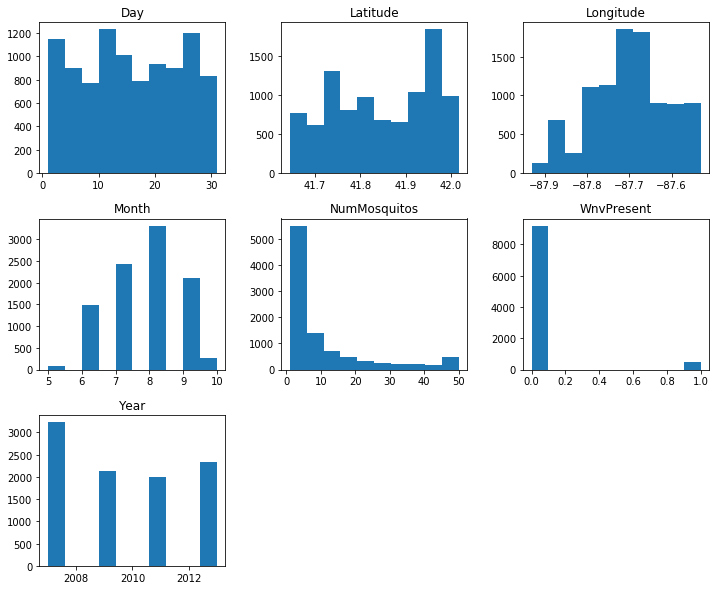

In [7]:
#There is an outlier in the NumMosquitos=50

train.hist(figsize=(12,10), grid=False)
plt.show()

In [8]:
train.NumMosquitos.value_counts() 

1     2261
2     1284
3      882
4      590
5      485
6      398
7      326
50     312
8      242
9      234
10     205
11     170
13     162
12     131
16     127
14     120
15     111
17     107
18      91
19      86
21      84
20      79
23      68
27      67
37      60
24      57
22      56
26      56
25      50
39      48
29      48
36      47
31      47
30      44
35      43
28      42
46      42
32      39
43      37
47      37
33      36
49      35
48      35
38      35
45      34
34      31
41      31
42      29
40      27
44      25
Name: NumMosquitos, dtype: int64

Text(0.5, 1.0, 'Distribution of Traps with 50 Mosquitos per Month and Year')

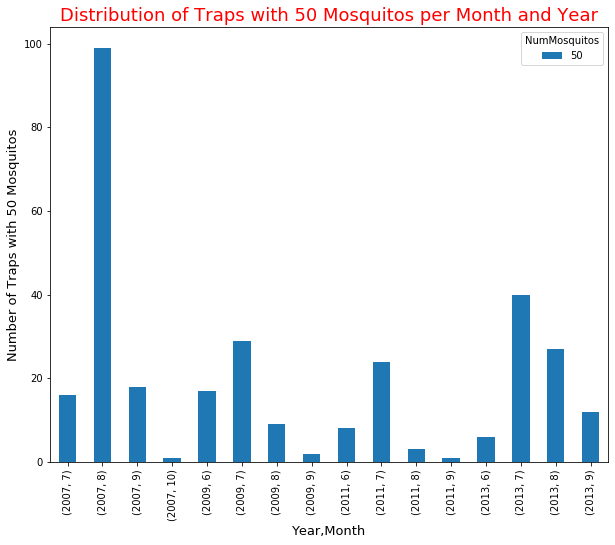

In [9]:
# 50 Mosquitos per Trap are mostly in August,2007.
train[train['NumMosquitos']==50].groupby(['Year','Month'])['NumMosquitos'].value_counts().unstack().plot.bar(figsize=(10,8))  
plt.xlabel('Year,Month', size=13)
plt.ylabel('Number of Traps with 50 Mosquitos', size=13)
plt.title('Distribution of Traps with 50 Mosquitos per Month and Year', size=18, color='red')
# WE will examine this chart with the weather 

Text(0.5, 1.0, 'Traps per Number of Mosquitos with Virus')

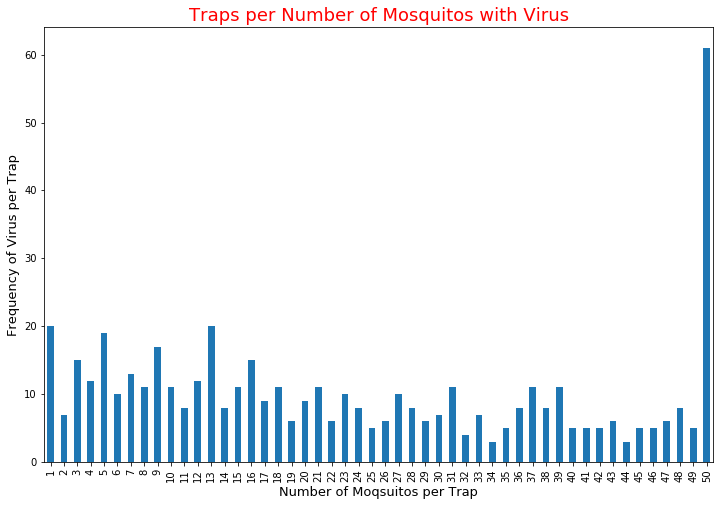

In [10]:
train[train['WnvPresent']==1].groupby('NumMosquitos')['WnvPresent'].sum().plot.bar(figsize=(12,8))  
plt.xlabel('Number of Moqsuitos per Trap', size=13)
plt.ylabel('Frequency of Virus per Trap', size=13)
plt.title('Traps per Number of Mosquitos with Virus', size=18, color='red')

In [11]:
# 5% of the Mosquitos have the virus.

train.WnvPresent.value_counts()/len(train.WnvPresent) *100

0    94.810688
1     5.189312
Name: WnvPresent, dtype: float64

**Visual Data Exploration By Using Map**

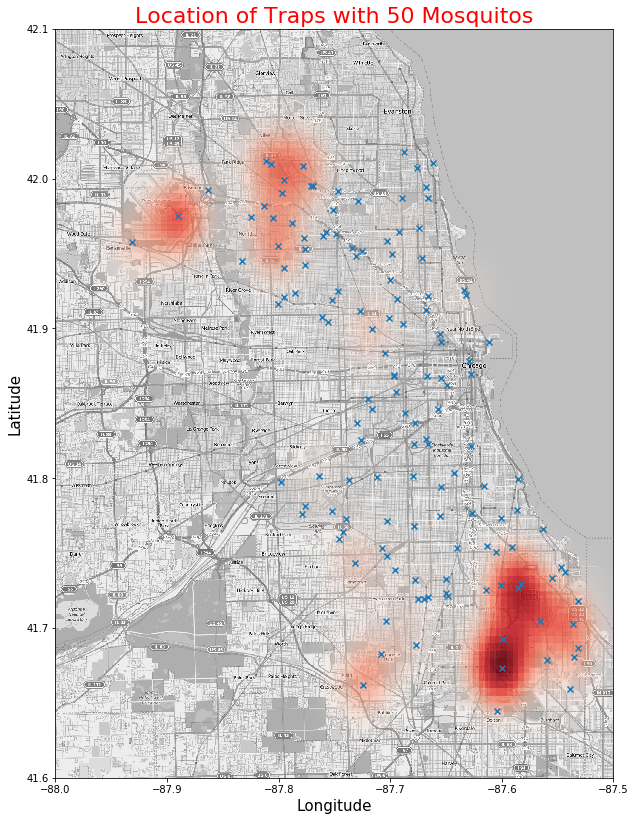

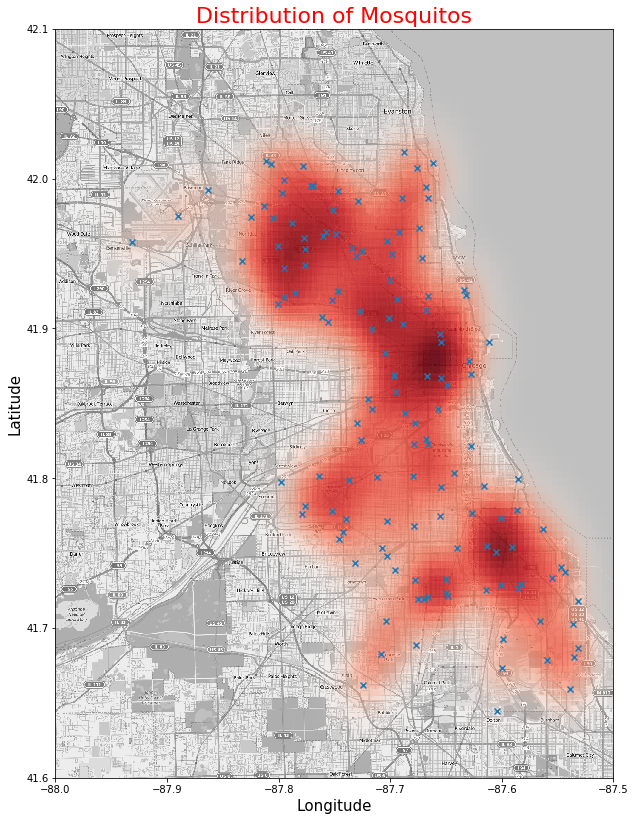

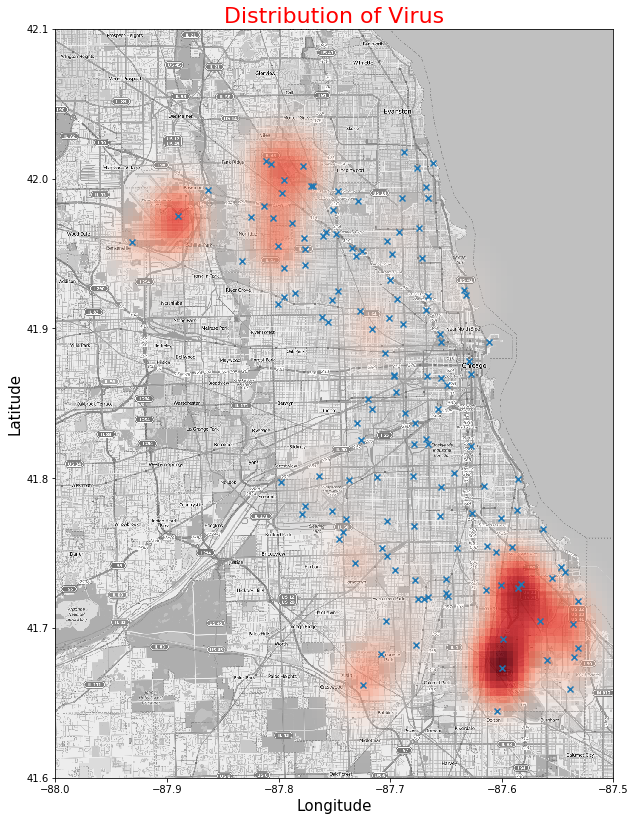

In [12]:
#  Traps with 50 Mosquitos are mostly located near the southern part of Lake Michigan.

#  The large number of mosquitos are found close to the Lake Michigan, whereas the viruses are mostly in the southern traps. 


from sklearn.neighbors import KernelDensity

mapdata = np.loadtxt("mapdata_copyright_openstreetmap_contributors.txt")
traps = train[['Date','Longitude', 'Latitude', 'WnvPresent','NumMosquitos']]

alpha_cm = plt.cm.Reds
alpha_cm._init()
alpha_cm._lut[:-3,-1] = abs(np.logspace(0, 1, alpha_cm.N) / 10 - 1)[::-1]
aspect = mapdata.shape[0] * 1.0 / mapdata.shape[1]
lon_lat_box = (-88, -87.5, 41.6, 42.1)

sigthings = traps[(traps['WnvPresent']==1) & (traps['NumMosquitos'] == 50)]
sigthings = sigthings.groupby(['Date','Longitude', 'Latitude'])['WnvPresent'].sum().reset_index()
X = sigthings[['Longitude', 'Latitude']].values
kd = KernelDensity(bandwidth=0.02)
kd.fit(X)

xv,yv = np.meshgrid(np.linspace(-88, -87.5, 100), np.linspace(41.6, 42.1, 100))
gridpoints = np.array([xv.ravel(),yv.ravel()]).T
zv = np.exp(kd.score_samples(gridpoints).reshape(100,100))

plt.figure(figsize=(10,14))
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=lon_lat_box, aspect=aspect)
plt.imshow(zv,origin='lower',cmap=alpha_cm, extent=lon_lat_box, aspect=aspect)

locations = traps[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(locations[:,0], locations[:,1], marker='x')
plt.title('Location of Traps with 50 Mosquitos', fontsize=22, color='red')
plt.xlabel('Longitude', fontsize=15)
plt.ylabel('Latitude', fontsize=15)
plt.show()


sigthings2 = traps.groupby(['Date','Longitude', 'Latitude'])['NumMosquitos'].sum().reset_index()
X = sigthings2[['Longitude', 'Latitude']].values
kd2 = KernelDensity(bandwidth=0.02)
kd2.fit(X)
zv2 = np.exp(kd2.score_samples(gridpoints).reshape(100,100))

plt.figure(figsize=(10,14))
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=lon_lat_box, aspect=aspect)
plt.imshow(zv2, origin='lower', cmap=alpha_cm,extent=lon_lat_box, aspect=aspect)

locations = traps[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(locations[:,0], locations[:,1], marker='x')
plt.title('Distribution of Mosquitos', fontsize=22, color='red')
plt.xlabel('Longitude', fontsize=15)
plt.ylabel('Latitude', fontsize=15)
plt.show()


sigthings3 = traps[traps['WnvPresent']==1]
sigthings3 = sigthings.groupby(['Date','Longitude', 'Latitude'])['WnvPresent'].sum().reset_index()
X = sigthings3[['Longitude', 'Latitude']].values
kd3 = KernelDensity(bandwidth=0.02)
kd3.fit(X)
zv3 = np.exp(kd3.score_samples(gridpoints).reshape(100,100))

plt.figure(figsize=(10,14))
plt.imshow(mapdata, cmap=plt.get_cmap('gray'), extent=lon_lat_box, aspect=aspect)
plt.imshow(zv3, origin='lower', cmap=alpha_cm,extent=lon_lat_box,aspect=aspect)

locations = traps[['Longitude', 'Latitude']].drop_duplicates().values
plt.scatter(locations[:,0], locations[:,1], marker='x')
plt.title('Distribution of Virus', fontsize=22, color='red')
plt.xlabel('Longitude', fontsize=15)
plt.ylabel('Latitude', fontsize=15)
plt.show()

In [13]:
# The most common mosquitos species are Culex Pipiens/Restuans,Culex Restuans and Culex Pipiens And only they have the virus.

# Culex Restuans has the lowest Virus rate among them.

print('Percentage of Species: ','\n\n',train.Species.value_counts()/len(train.Species) *100, '\n\n')

print('Percentage of Virus per Species:','\n\n',train[train['WnvPresent']==1]['Species'].value_counts()/len(train.Species))

Percentage of Species:  

 CULEX PIPIENS/RESTUANS    46.105437
CULEX RESTUANS            27.566285
CULEX PIPIENS             23.099144
CULEX TERRITANS            2.279996
CULEX SALINARIUS           0.876921
CULEX TARSALIS             0.061900
CULEX ERRATICUS            0.010317
Name: Species, dtype: float64 


Percentage of Virus per Species: 

 CULEX PIPIENS/RESTUANS    0.025379
CULEX PIPIENS             0.021459
CULEX RESTUANS            0.005055
Name: Species, dtype: float64


In [14]:
train.groupby(['WnvPresent', 'Month'])['Species'].value_counts().unstack().fillna(0)

Species           CULEX ERRATICUS  CULEX PIPIENS  CULEX PIPIENS/RESTUANS  \
WnvPresent Month                                                           
0          5                  0.0            4.0                    41.0   
           6                  0.0           80.0                   639.0   
           7                  0.0          290.0                  1080.0   
           8                  0.0          914.0                  1383.0   
           9                  1.0          635.0                   953.0   
           10                 0.0          108.0                   127.0   
1          6                  0.0            0.0                     1.0   
           7                  0.0            1.0                    22.0   
           8                  0.0          154.0                   158.0   
           9                  0.0           51.0                    65.0   
           10                 0.0            2.0                     0.0   

Species           CULEX RESTUANS  CULEX SALINARIUS  CULEX TARSALIS  \
WnvPresent Month                                                     
0          5                38.0               0.0             0.0   
           6               726.0              16.0             0.0   
           7               936.0              29.0             0.0   
           8               565.0              24.0             1.0   
           9               332.0              15.0             5.0   
           10               26.0               1.0             0.0   
1          6                 0.0               0.0             0.0   
           7                19.0               0.0             0.0   
           8                25.0               0.0             0.0   
           9                 5.0               0.0             0.0   
           10                0.0               0.0             0.0   

Species           CULEX TERRITANS  
WnvPresent Month                   
0          5                  0.0  
           6                 25.0  
           7                 50.0  
           8                 84.0  
           9                 50.0  
           10                12.0  
1          6                  0.0  
           7                  0.0  
           8                  0.0  
           9                  0.0  
           10                 0.0

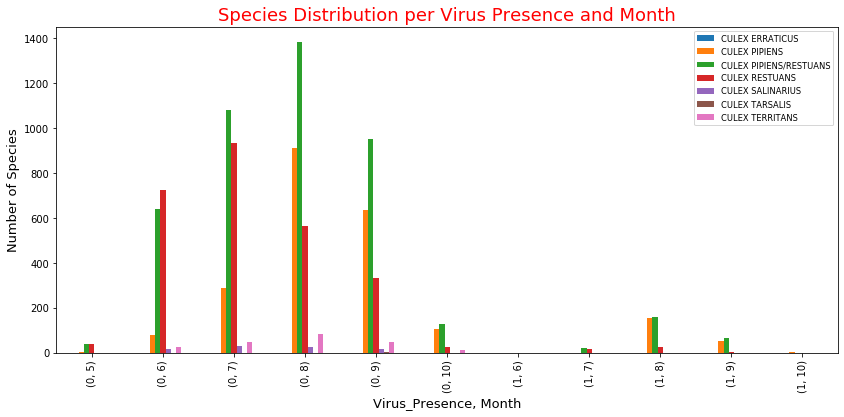

In [15]:
# Despite the large numbers of mosquitos in June and July, the virus ratio is quite low.

Virus_Species_Month=train.groupby(['WnvPresent', 'Month'])['Species'].value_counts().unstack().fillna(0)
Virus_Species_Month.plot.bar(figsize=(14,6))
plt.grid(False)
plt.legend(bbox_to_anchor=(1, 1), fontsize='small')
plt.xlabel('Virus_Presence, Month', fontsize=13)
plt.ylabel('Number of Species', fontsize=13)
plt.title('Species Distribution per Virus Presence and Month', fontsize=18, color='red')
plt.show()     

In [16]:
train.to_csv('./Cleaned_Data/cleaned_train.csv', index=False)

# Test Data

In [17]:
test= pd.read_csv('test.csv')
test.head()

,Id,Date,Address,Species,Block,Street,Trap,AddressNumberAndStreet,Latitude,Longitude,AddressAccuracy
0,1,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS/RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
1,2,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX RESTUANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
2,3,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX PIPIENS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
3,4,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX SALINARIUS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9
4,5,2008-06-11,"4100 North Oak Park Avenue, Chicago, IL 60634,...",CULEX TERRITANS,41,N OAK PARK AVE,T002,"4100 N OAK PARK AVE, Chicago, IL",41.95469,-87.800991,9


In [18]:
test['Date']=pd.to_datetime(test['Date'])
test['Year'] = pd.DatetimeIndex(test['Date']).year
test['Month'] = pd.DatetimeIndex(test['Date']).month
test['Day'] = pd.DatetimeIndex(test['Date']).day
test['Week'] = pd.DatetimeIndex(test['Date']).week
test.info()    # NO MISSING DATA

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116293 entries, 0 to 116292
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   Id                      116293 non-null  int64         
 1   Date                    116293 non-null  datetime64[ns]
 2   Address                 116293 non-null  object        
 3   Species                 116293 non-null  object        
 4   Block                   116293 non-null  int64         
 5   Street                  116293 non-null  object        
 6   Trap                    116293 non-null  object        
 7   AddressNumberAndStreet  116293 non-null  object        
 8   Latitude                116293 non-null  float64       
 9   Longitude               116293 non-null  float64       
 10  AddressAccuracy         116293 non-null  int64         
 11  Year                    116293 non-null  int64         
 12  Month                   116293

In [19]:
new_colum_list=[ 'Date','Species', 'Latitude', 'Longitude','Year','Month','Week','Day']
test= test[new_colum_list]
test.head()

,Date,Species,Latitude,Longitude,Year,Month,Week,Day
0,2008-06-11,CULEX PIPIENS/RESTUANS,41.95469,-87.800991,2008,6,24,11
1,2008-06-11,CULEX RESTUANS,41.95469,-87.800991,2008,6,24,11
2,2008-06-11,CULEX PIPIENS,41.95469,-87.800991,2008,6,24,11
3,2008-06-11,CULEX SALINARIUS,41.95469,-87.800991,2008,6,24,11
4,2008-06-11,CULEX TERRITANS,41.95469,-87.800991,2008,6,24,11


In [20]:
print('Number of Duplicates:', len(test[test.duplicated()]),'\n')
test.drop_duplicates(inplace=True)
print(test.info())

Number of Duplicates: 1533 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114760 entries, 0 to 116292
Data columns (total 8 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   Date       114760 non-null  datetime64[ns]
 1   Species    114760 non-null  object        
 2   Latitude   114760 non-null  float64       
 3   Longitude  114760 non-null  float64       
 4   Year       114760 non-null  int64         
 5   Month      114760 non-null  int64         
 6   Week       114760 non-null  int64         
 7   Day        114760 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(4), object(1)
memory usage: 7.9+ MB
None


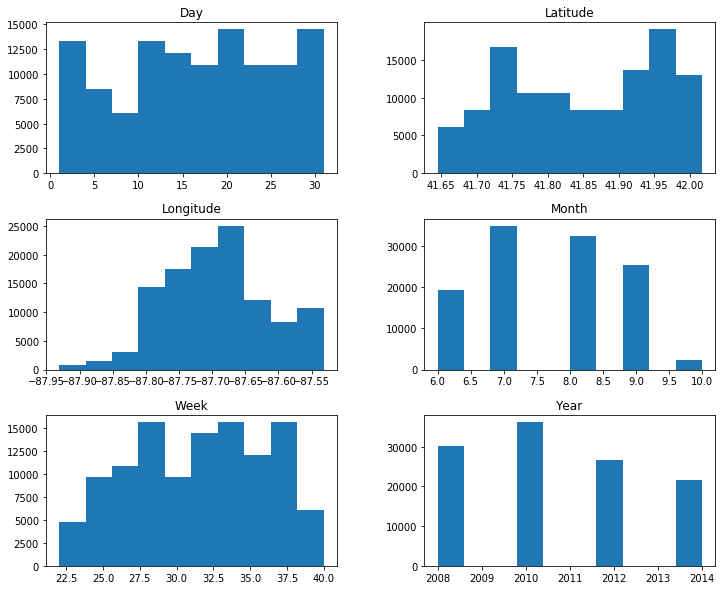

In [21]:
test.hist(figsize=(12,10), grid=False)
plt.show()

In [22]:
test.to_csv('./Cleaned_Data/cleaned_test.csv', index=False)

# Spray Data

In [23]:
spray= pd.read_csv('spray.csv')
spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [24]:
spray.drop(['Time'], axis=1, inplace=True)
spray['Date']=pd.to_datetime(spray['Date'])
spray['Year'] = pd.DatetimeIndex(spray['Date']).year
spray['Month'] = pd.DatetimeIndex(spray['Date']).month
spray['Day'] = pd.DatetimeIndex(spray['Date']).day
spray['Week'] = pd.DatetimeIndex(spray['Date']).week
spray['YearWeek']= (spray['Year'].astype(str)+spray['Week'].astype(str)).astype('int64')
spray['YearMonth']=(spray['Year'].astype(str)+spray['Month'].astype(str)).astype('int64')
spray.drop(['Week'], axis=1, inplace=True)

In [25]:
spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       14835 non-null  datetime64[ns]
 1   Latitude   14835 non-null  float64       
 2   Longitude  14835 non-null  float64       
 3   Year       14835 non-null  int64         
 4   Month      14835 non-null  int64         
 5   Day        14835 non-null  int64         
 6   YearWeek   14835 non-null  int64         
 7   YearMonth  14835 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5)
memory usage: 927.3 KB


In [26]:
print('Number of Duplicates:', len(spray[spray.duplicated()]), '\n')
spray.drop_duplicates(inplace=True)
print(spray.info())

Number of Duplicates: 541 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14294 entries, 0 to 14834
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       14294 non-null  datetime64[ns]
 1   Latitude   14294 non-null  float64       
 2   Longitude  14294 non-null  float64       
 3   Year       14294 non-null  int64         
 4   Month      14294 non-null  int64         
 5   Day        14294 non-null  int64         
 6   YearWeek   14294 non-null  int64         
 7   YearMonth  14294 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(5)
memory usage: 1005.0 KB
None


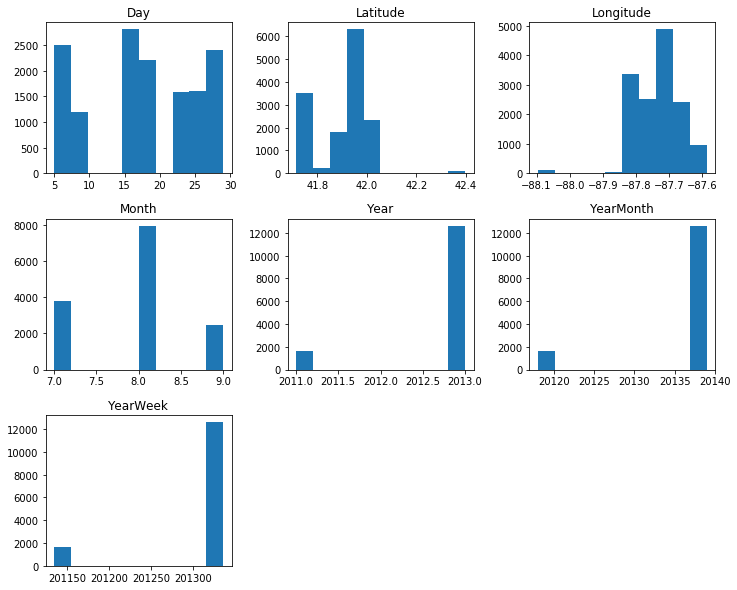

In [27]:
spray.hist(figsize=(12,10), grid=False)
plt.show()

In [28]:
spray.head()

,Date,Latitude,Longitude,Year,Month,Day,YearWeek,YearMonth
0,2011-08-29,42.391623,-88.089163,2011,8,29,201135,20118
1,2011-08-29,42.391348,-88.089163,2011,8,29,201135,20118
2,2011-08-29,42.391022,-88.089157,2011,8,29,201135,20118
3,2011-08-29,42.390637,-88.089158,2011,8,29,201135,20118
4,2011-08-29,42.390410,-88.088858,2011,8,29,201135,20118


In [29]:
spray.Date.value_counts() 

2013-08-15    2668
2013-08-29    2302
2013-07-17    2202
2013-07-25    1607
2013-08-22    1587
2011-09-07    1573
2013-08-08    1195
2013-09-05     924
2013-08-16     141
2011-08-29      95
Name: Date, dtype: int64

In [30]:
spray.to_csv('./Cleaned_Data/cleaned_spray.csv', index=False)

# Weather Data

In [31]:
weather=pd.read_csv('weather.csv')
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [32]:
weather['Date'] = pd.to_datetime(weather['Date'])
missing_value= ['M', ' ','-', '  T']
weather.replace(missing_value, np.nan, inplace=True)
weather.info()
# there are many missing values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Station      2944 non-null   int64         
 1   Date         2944 non-null   datetime64[ns]
 2   Tmax         2944 non-null   int64         
 3   Tmin         2944 non-null   int64         
 4   Tavg         2933 non-null   object        
 5   Depart       1472 non-null   object        
 6   DewPoint     2944 non-null   int64         
 7   WetBulb      2940 non-null   object        
 8   Heat         2933 non-null   object        
 9   Cool         2933 non-null   object        
 10  Sunrise      1472 non-null   object        
 11  Sunset       1472 non-null   object        
 12  CodeSum      1335 non-null   object        
 13  Depth        1472 non-null   object        
 14  Water1       0 non-null      float64       
 15  SnowFall     1460 non-null   object        
 16  Precip

In [33]:
missing_data= ['CodeSum','Water1','Depth','SnowFall','Sunrise','Sunset','Depart']
for i in missing_data:
    value=list()
    value.append(weather[i].value_counts(dropna=False))
    print('For',i,': \n', value,'\n')
# CodeSum: Too much NAN, we can't interpret from other values >>  DROP
# Water: ALl NAN >> DROP
# Depth:  All values are NAN and zero. Reason: no SNow during 05-10 months. >>  DROP
# SNowfall: DROP
# Depart : NAN values belong to Station 2. Tmax, Tmin and Tavg values per day are almost same withStation 1. 
# Therefore we will replace NAN values with Station 1's value.  
# Sunset, Sunrise: DROP

For CodeSum : 
 [NaN                    1609
RA                      296
RA BR                   238
BR                      110
TSRA RA BR               92
                       ... 
TSRA RA BR HZ VCTS        1
TSRA BR HZ VCTS           1
RA DZ FG+ BR HZ           1
TS TSRA RA FG BR          1
TS TSRA RA FG BR HZ       1
Name: CodeSum, Length: 98, dtype: int64] 

For Water1 : 
 [NaN    2944
Name: Water1, dtype: int64] 

For Depth : 
 [0      1472
NaN    1472
Name: Depth, dtype: int64] 

For SnowFall : 
 [NaN    1484
0.0    1459
0.1       1
Name: SnowFall, dtype: int64] 

For Sunrise : 
 [NaN     1472
0416     104
0417      64
0419      40
0420      32
        ... 
0537       8
0454       8
0547       8
0519       8
0600       8
Name: Sunrise, Length: 122, dtype: int64] 

For Sunset : 
 [NaN     1472
1931      96
1930      56
1929      48
1928      32
        ... 
1746       8
1748       8
1848       8
1654       8
1650       8
Name: Sunset, Length: 119, dtype: int64] 

For Depart : 


In [34]:
drop_list= ['CodeSum','Water1','Depth','SnowFall','Sunrise','Sunset']
weather.drop(drop_list,axis=1, inplace=True)

In [35]:
weather['Depart'].fillna(method = 'ffill', inplace=True)
weather['SeaLevel'].fillna(method = 'ffill', inplace=True)
weather['AvgSpeed'].fillna(method = 'ffill', inplace=True)
weather['StnPressure'].fillna(method = 'ffill', inplace=True)
weather['PrecipTotal'].fillna(method = 'ffill', inplace=True)

In [36]:
weather['Tavg'] = weather.apply( lambda x: round((x['Tmax'] + x['Tmin'])/2) if pd.isnull(x['Tavg']) else x['Tavg'],axis=1)
weather['Tavg']= pd.to_numeric(weather['Tavg'])

In [37]:
weather['Heat']=weather.apply( lambda x: (65- x['Tavg']) if x['Tavg']<65 else 0, axis=1)
weather['Cool']=weather.apply( lambda x: (x['Tavg']-65) if x['Tavg']>65 else 0, axis=1)

In [38]:
# After hnadling with the missing values:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Station      2944 non-null   int64         
 1   Date         2944 non-null   datetime64[ns]
 2   Tmax         2944 non-null   int64         
 3   Tmin         2944 non-null   int64         
 4   Tavg         2944 non-null   int64         
 5   Depart       2944 non-null   object        
 6   DewPoint     2944 non-null   int64         
 7   WetBulb      2940 non-null   object        
 8   Heat         2944 non-null   int64         
 9   Cool         2944 non-null   int64         
 10  PrecipTotal  2944 non-null   object        
 11  StnPressure  2944 non-null   object        
 12  SeaLevel     2944 non-null   object        
 13  ResultSpeed  2944 non-null   float64       
 14  ResultDir    2944 non-null   int64         
 15  AvgSpeed     2944 non-null   object        
dtypes: dat

In [39]:
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,14,51,57,0,3,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,-3,42,47,13,0,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,0.00,29.39,30.12,11.7,7,11.9


In [40]:
weather.groupby('Station')['Tmax', 'Tmin', 'Tavg', 'Depart', 'DewPoint', 'WetBulb','Heat', 'Cool', 
                           'PrecipTotal', 'StnPressure', 'SeaLevel', 'ResultSpeed','ResultDir', 
                           'AvgSpeed'].agg('mean').T
# WE SEE THAT THERE IS NOT MUCH DIFFERENCE BETWEEN DATA. In order to aviod duplicate, WE WILL GET THE AVERAGES per each date 

C:\Users\laptop\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


Station,1,2
Tmax,75.978940,76.353261
Tmin,56.730978,58.889946
Tavg,66.606658,67.872283
DewPoint,53.377717,53.538043
Heat,3.631114,3.174592
Cool,5.237772,6.046875
ResultSpeed,6.987092,6.934239
ResultDir,17.656250,17.333560


In [41]:
weather=(weather.groupby('Date').agg('sum')/2).reset_index()
weather.drop(['Station'], axis=1, inplace=True)
weather['Year'] = pd.DatetimeIndex(weather['Date']).year
weather['Month'] = pd.DatetimeIndex(weather['Date']).month
weather['Day'] = pd.DatetimeIndex(weather['Date']).day
weather['Week'] = pd.DatetimeIndex(weather['Date']).week
weather.head()

,Date,Tmax,Tmin,Tavg,DewPoint,Heat,Cool,ResultSpeed,ResultDir,Year,Month,Day,Week
0,2007-05-01,83.5,51.0,67.5,51.0,0.0,2.5,2.20,26.0,2007,5,1,18
1,2007-05-02,59.5,42.5,51.5,42.0,13.5,0.0,13.15,3.0,2007,5,2,18
2,2007-05-03,66.5,47.0,57.0,40.0,8.0,0.0,12.30,6.5,2007,5,3,18
3,2007-05-04,72.0,50.0,61.0,41.5,4.0,0.0,10.25,7.5,2007,5,4,18
4,2007-05-05,66.0,53.5,60.0,38.5,5.0,0.0,11.45,7.0,2007,5,5,18


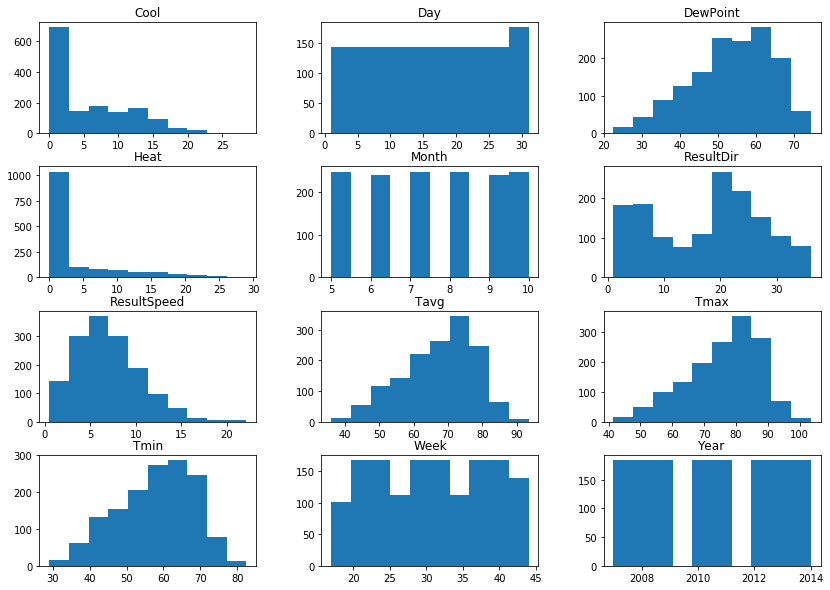

In [42]:
weather.hist(figsize=(14,10), grid= False)
plt.show()

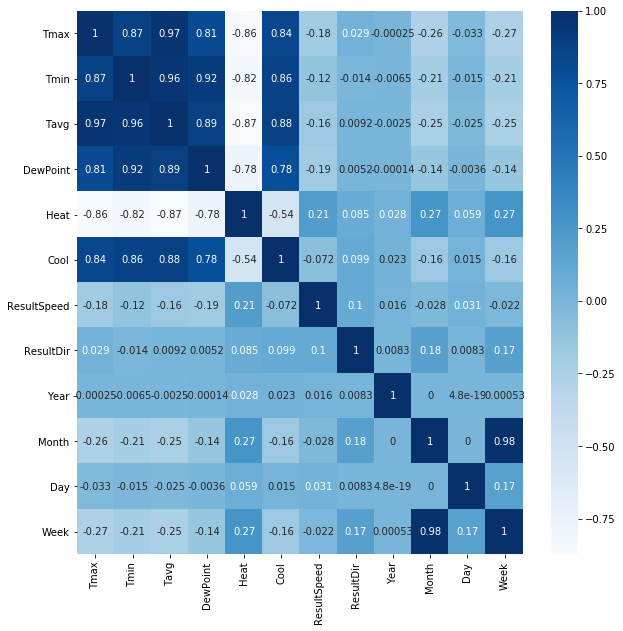

In [43]:
fig, ax = plt.subplots(figsize=(10,10))  
sns.heatmap(weather.corr(), annot=True,cmap ='Blues')

In [44]:
weather.to_csv('./Cleaned_Data/cleaned_weather.csv', index=False)

**NOTES:** 

Since Tavg is mean of Tmax and Tmin they are highly correlated. Also Heat and Cool are the differences of Tavg and Base Temperature they are also highly correlated. 

I haven't yet decided which ones to drop. I will merge weather data with train data. Therefore I may need all of them for data exploratory. 